In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sprint.loading import load_model

In [3]:
model = load_model()

Loaded pretrained model gelu-1l into HookedTransformer
Moving model to device:  cuda
Changing model dtype to torch.float16
Model device: cuda:0


In [4]:
model.W_E.shape

torch.Size([48262, 512])

In [12]:
from sprint.loading import load_sae

sae = load_sae()

{'batch_size': 4096,
 'beta1': 0.9,
 'beta2': 0.99,
 'buffer_batches': 12288,
 'buffer_mult': 384,
 'buffer_size': 1572864,
 'd_mlp': 2048,
 'dict_mult': 8,
 'enc_dtype': 'fp32',
 'l1_coeff': 0.0003,
 'lr': 0.0001,
 'model_batch_size': 512,
 'num_tokens': 2000000000,
 'seed': 52,
 'seq_len': 128}
Encoder device: cuda:0


In [6]:
sae.W_enc

Parameter containing:
tensor([[ 0.0236,  0.0258,  0.0368,  ..., -0.0038,  0.0019,  0.0328],
        [ 0.0544,  0.0569,  0.0762,  ..., -0.0279, -0.0444,  0.0822],
        [ 0.0708,  0.0739,  0.0848,  ...,  0.0178, -0.0385,  0.1089],
        ...,
        [ 0.1078,  0.1524,  0.1209,  ..., -0.0123,  0.0174,  0.1781],
        [-0.0184, -0.0424, -0.0188,  ..., -0.0095,  0.0281, -0.0219],
        [ 0.0281,  0.0417,  0.0677,  ..., -0.0046, -0.0456,  0.0664]],
       device='cuda:0', requires_grad=True)

In [7]:
sae.W_dec

Parameter containing:
tensor([[ 0.1203,  0.0064,  0.0394,  ...,  0.0082,  0.0230,  0.0119],
        [-0.0442,  0.0203,  0.0384,  ..., -0.0601,  0.0098,  0.0657],
        [-0.0243, -0.0416, -0.0285,  ...,  0.0682,  0.0181,  0.0417],
        ...,
        [ 0.0351, -0.0409,  0.0095,  ..., -0.0118,  0.0429, -0.0295],
        [ 0.0246, -0.0317, -0.0045,  ..., -0.0002, -0.0299, -0.0293],
        [-0.0495, -0.0162, -0.0167,  ..., -0.0377, -0.0259, -0.0249]],
       device='cuda:0', requires_grad=True)

In [4]:
from sprint.loading import load_all

model, data, sae = load_all()
my_token = " ह"
my_token_id = model.to_single_token(my_token)
print(my_token_id)

Loaded pretrained model gelu-1l into HookedTransformer
Moving model to device:  cuda
Changing model dtype to torch.float16
Model device: cuda:0
Tokens shape: torch.Size([215402, 128]), dtype: torch.int64, device: cuda:0
{'batch_size': 4096,
 'beta1': 0.9,
 'beta2': 0.99,
 'buffer_batches': 12288,
 'buffer_mult': 384,
 'buffer_size': 1572864,
 'd_mlp': 2048,
 'dict_mult': 8,
 'enc_dtype': 'fp32',
 'l1_coeff': 0.0003,
 'lr': 0.0001,
 'model_batch_size': 512,
 'num_tokens': 2000000000,
 'seed': 52,
 'seq_len': 128}
Encoder device: cuda:0
27815


In [6]:
import numpy as np

np.where(data.cpu().numpy() == 27815)

(array([106821, 106821]), array([27, 39]))

In [11]:
"".join(model.tokenizer.batch_decode(data[106821]))

'<|BOS|>���ा मुद्यांवर पुन्हा ��र्��ा हो�� ��ागलीय. हिंदी सिनेस����्��ीत ��नेक ��र्��ं ��ावर��ारा ����्��पैल�� ����िनेता ��तुल कुलकर्��ी ��ाने ��ा��ा��'

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,
         1.,  1.,  1.,  2.,  1.,  3.,  4.,  3.,  7.,  2.,  7.,  5.,  4.,
         6., 13.,  6., 10., 23., 20., 23., 21., 22., 28., 33., 37., 34.,
        59., 42., 58., 64., 70., 74., 78., 84., 82., 74., 82., 96., 90.,
        75., 67., 69., 63., 63., 65., 63., 38., 39., 39., 24., 21., 25.,
        17., 18., 14.,  9., 10.,  8.,  6.,  7.,  2.,  1.,  2.,  6.,  0.,
         4.,  3.,  1.,  3.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([-2.63183594e-01, -2.57812500e-01, -2.52197266e-01, -2.46704102e-01,
        -2.41210938e-01, -2.35717773e-01, -2.30224609e-01, -2.24731445e-01,
        -2.19238281e-01, -2.13745117e-01, -2.08251953e-01, -2.02758789e-01,
        -1.97265625e-01, -1.91894531e-01, -1.86401367e-01, -1.80908203e-01,
        -1.75415039e-01, -1.69921875e-01, -1.64428711e-01, -1.58935547e-01,
        -1.53442383e-01, -1.47949219e-01, -1.42456055e

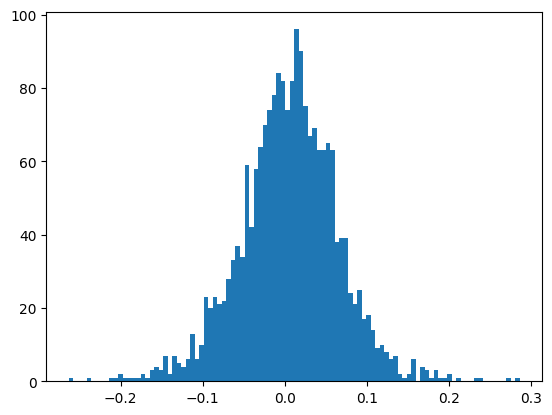

In [17]:
import matplotlib.pyplot as plt

plt.hist(sae.W_enc[:, 10996].detach().cpu().numpy(), bins=100)

In [18]:
sae.W_enc[:, 10996].abs().max()

tensor(0.2856, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>)

In [40]:
from sprint.loading import load_model, load_data

model, data = load_model(), load_data(model=model, dataset_name="NeelNanda/c4-code-tokenized-2b")

t1 = model.to_single_token("Illustration")
t2 = model.to_single_token("')")
# t2 = model.to_single_token("('")
print(t1, t2)

i1 = np.where(data.cpu() == t1)
i2 = np.where(data.cpu() == t2)

print(set(i1[0]).intersection(set(i2[0])))

Loaded pretrained model gelu-1l into HookedTransformer
Moving model to device:  cuda
Changing model dtype to torch.float16
Model device: cuda:0


Resolving data files: 100%|██████████| 28/28 [00:00<00:00, 332.73it/s]


ValueError: Column name text not in the dataset. Current columns in the dataset: []

In [36]:
import torch

model.to_str_tokens(torch.tensor([8]))

['&']

In [37]:
data.shape

torch.Size([215402, 128])

In [2]:
from datasets import load_dataset

data = load_dataset("NeelNanda/c4-code-tokenized-2b", split="train")
data["tokens"][:32]

Resolving data files: 100%|██████████| 28/28 [00:05<00:00,  5.48it/s]


[[1,
  7353,
  254,
  27361,
  42009,
  310,
  1815,
  310,
  1817,
  2411,
  343,
  254,
  3941,
  274,
  248,
  11812,
  16,
  1822,
  310,
  573,
  282,
  513,
  311,
  913,
  597,
  343,
  618,
  7417,
  286,
  321,
  4558,
  282,
  1309,
  347,
  43,
  513,
  4,
  282,
  254,
  636,
  274,
  618,
  13331,
  16,
  188,
  1212,
  497,
  3686,
  276,
  12810,
  670,
  360,
  1652,
  9331,
  286,
  2980,
  282,
  751,
  6841,
  276,
  4852,
  14500,
  14,
  830,
  310,
  715,
  8697,
  432,
  16,
  310,
  2980,
  248,
  1330,
  14,
  14701,
  11812,
  16,
  839,
  3156,
  939,
  248,
  1603,
  13860,
  286,
  1102,
  436,
  580,
  16,
  731,
  369,
  624,
  11728,
  32227,
  14,
  286,
  701,
  573,
  248,
  2187,
  624,
  4466,
  282,
  5053,
  432,
  16,
  9547,
  371,
  28961,
  852,
  272,
  8418,
  2545,
  14,
  353,
  369,
  8611,
  3834,
  3,
  731,
  369,
  593,
  3941,
  1903,
  14,
  701,
  2263,
  1521,
  274,
  3148,
  16,
  1469,
  1623,
  5887,
  616,
  4866,
  3,
  1286

In [5]:
data[0].shape

AttributeError: 'dict' object has no attribute 'shape'

In [3]:
from sprint.loading import load_all
from sprint.feature_exploration import max_activating_examples

model, data, sae = load_all()

out = max_activating_examples(feature_id=4542, n_examples=10, model=model, data=data)

Loaded pretrained model gelu-1l into HookedTransformer
Moving model to device:  cuda
Changing model dtype to torch.float16
Model device: cuda:0
Tokens shape: torch.Size([215402, 128]), dtype: torch.int64, device: cuda:0
{'batch_size': 4096,
 'beta1': 0.9,
 'beta2': 0.99,
 'buffer_batches': 12288,
 'buffer_mult': 384,
 'buffer_size': 1572864,
 'd_mlp': 2048,
 'dict_mult': 8,
 'enc_dtype': 'fp32',
 'l1_coeff': 0.0003,
 'lr': 0.0001,
 'model_batch_size': 512,
 'num_tokens': 2000000000,
 'seed': 52,
 'seq_len': 128}


KeyboardInterrupt: 

In [3]:
len(out)

3

In [17]:
from sprint.visualization import get_topk
from sprint.loading import load_all

model, data, sae = load_all()
df, vals = get_topk(feature_id=15954, model=model, n_examples=10, pad=True, clip=10)

Loaded pretrained model gelu-1l into HookedTransformer
Moving model to device:  cuda
Changing model dtype to torch.float16
Model device: cuda:0
Tokens shape: torch.Size([215402, 128]), dtype: torch.int64, device: cuda:0
{'batch_size': 4096,
 'beta1': 0.9,
 'beta2': 0.99,
 'buffer_batches': 12288,
 'buffer_mult': 384,
 'buffer_size': 1572864,
 'd_mlp': 2048,
 'dict_mult': 8,
 'enc_dtype': 'fp32',
 'l1_coeff': 0.0003,
 'lr': 0.0001,
 'model_batch_size': 512,
 'num_tokens': 2000000000,
 'seed': 52,
 'seq_len': 128}
Encoder device: cuda:0
Tokens shape: torch.Size([215402, 128]), dtype: torch.int64, device: cuda:0


In [18]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
89597,.,For,additional,information,and,locations,",",please,visit,:,www,.,park,mobile,.,io,or,www,.,park
185061,a,in,Great,Britain,",",please,visit,our,website,at,www,.,c,oca,-,col,a,.,co,.
59466,at,alliance,rep,co,@,gmail,.,com,or,visit,www,.,all,iance,rep,.,org,.,<|EOS|>,import
188285,more,details,can,be,seen,on,its,dedicated,website,at,www,.,ult,ra,prog,.,co,.,uk,and
24542,us,",",we,encourage,you,to,visit,our,website,:,www,.,mak,el,ove,grow,.,co,or,if
8583,proposal,options,and,a,complete,listing,of,topics,",",visit,www,.,pt,c,.,org,/,pt,c,2
130306,policy,through,advocacy,.,For,more,information,",",please,visit,www,.,ac,en,et,.,edu,or,follow,ACE
144672,You,can,order,this,teaching,today,by,going,online,:,www,.,aw,me,.,net,",",calling,our,Hel
191889,retailer,near,you,or,to,shop,online,",",please,visit,www,.,a,unt,f,ann,ies,.,com,<|EOS|>
158992,soft,.,com,The,Web,site,can,be,visited,at,www,.,get,soft,.,com,.,For,existing,users


In [19]:
vals

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
89597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.016419,0.0,0.0,0.0,0.0,0.0,0.0,2.685072,0.0,0.0
185061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.803280,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
59466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.734021,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0
188285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.567755,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
24542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.538791,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.491782,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
130306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.483175,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
144672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.450199,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
191889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.391195,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,NaN
158992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.316800,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


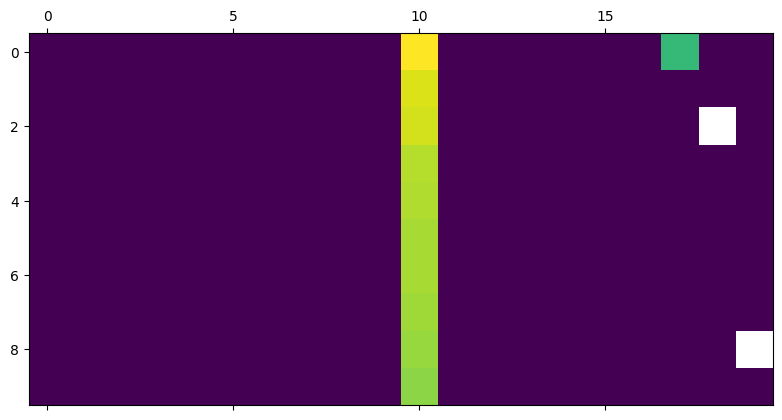

In [20]:
plt.matshow(vals)

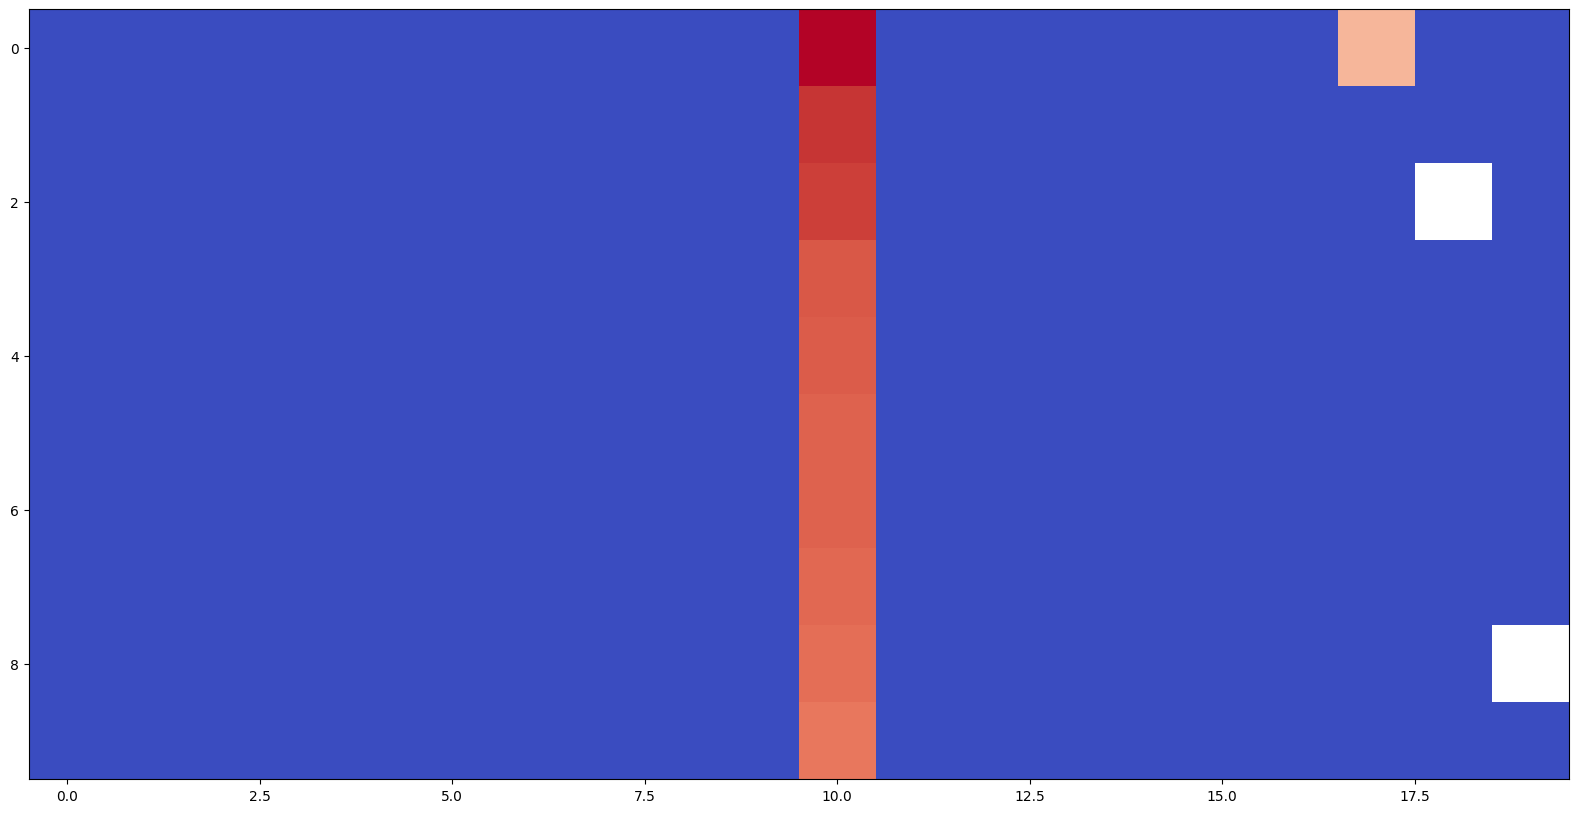

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(out[0].shape[1], out[0].shape[0]))
plt.imshow(out[1], cmap="coolwarm", vmin=0)


In [16]:
from sprint.visualization import visualize_topk

visualize_topk(feature_id=15954, model=model, n_examples=10, pad=True, clip=10)

Tokens shape: torch.Size([215402, 128]), dtype: torch.int64, device: cuda:0


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

ValueError: Image size of 786x7138340 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 960x480 with 1 Axes>

In [21]:
from sprint.loading import load_all

model, data, sae = load_all()

Loaded pretrained model gelu-1l into HookedTransformer
Moving model to device:  cuda
Changing model dtype to torch.float16
Model device: cuda:0
Tokens shape: torch.Size([215402, 128]), dtype: torch.int64, device: cuda:0
{'batch_size': 4096,
 'beta1': 0.9,
 'beta2': 0.99,
 'buffer_batches': 12288,
 'buffer_mult': 384,
 'buffer_size': 1572864,
 'd_mlp': 2048,
 'dict_mult': 8,
 'enc_dtype': 'fp32',
 'l1_coeff': 0.0003,
 'lr': 0.0001,
 'model_batch_size': 512,
 'num_tokens': 2000000000,
 'seed': 52,
 'seq_len': 128}
Encoder device: cuda:0


In [ ]:
model.to_single_token("")